# 공공데이터 상권정보 분석해보기

* https://www.data.go.kr/data/15083033/fileData.do
* 국가중점데이터인 상권정보 살펴보기
* `소상공인시장진흥공단_상가업소정보_의료기관_201909` 파일 다운로드

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd # 파이썬의 엑셀과 유사한 라이브러리
import numpy as np # 고성능의 수치계산, 행렬이나 대규모 다차원 배열을 쉽게 처리하기 위한 라이브러리
import seaborn as sns # 데이터 시각화

## 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # minus 폰트 깨짐 방지
# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## 데이터 로드하기
- 판다스에서 데이터를 로드할 때는 read_csv를 사용
- 데이터를 로드해서 df 라는 변수에 담는다.
- 그리고 shape를 통해 데이터의 갯수를 찍는다. 결과는 (행, 열) 순으로 출력

In [4]:
# read_csv로 불러온 파일을 df 변수에 담기
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)

In [5]:
df.shape # (행, 열)

(91335, 39)

## 데이터 미리보기
- head, tail을 통해 미리보기

In [6]:
# shift + tab => docstring 을 볼 수 있다.
# haed로 앞의 데이터 미리보기
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [7]:
# 마지막에 있는 데이터 = tail
df.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [8]:
# 랜덤 3개
df.sample(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
79048,12589050,애플치과의원,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,4711312200106670001000001,장량프라자,경상북도 포항시 북구 법원로 170,791270.0,37572.0,NaN,2,NaN,129.388094,36.089840
59947,22549547,연세한결치과의원,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1153010200106850448025134,신영상가,서울특별시 구로구 구일로4길 30,152050.0,8325.0,NaN,NaN,NaN,126.876433,37.491869
75509,12255904,미치과2F,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,4615013300116040003065760,금당빌딩,전라남도 순천시 조례못등길 16,540968.0,57968.0,NaN,NaN,NaN,127.526411,34.954211


## 데이터 요약하기

### 요약 정보

In [9]:
# info로 데이터 요약 미리보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [10]:
# 컬럼명만
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 결측치

In [11]:
df.isnull() # True/False로 나타낸다.

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [12]:
null_count = df.isnull().sum()

<AxesSubplot:>

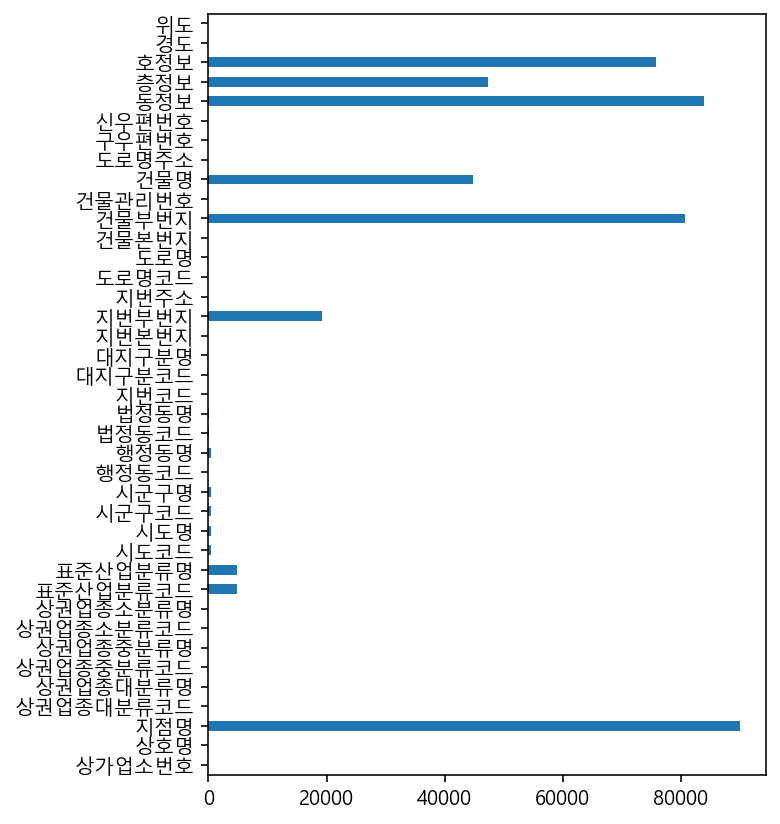

In [13]:
# plot.barh로 막대그래프로 표현
null_count.plot.barh(figsize=(5,7))

In [14]:
# 결측치를 reset_index를 통해 데이터프레임으로 만든다.
# df_null_count 변수에 결과를 담아 head로 미리보기
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [15]:
# df_null_cont 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [16]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬해서
# 결측치가 많은 상위 10개만 출력

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)

## 특정 컬럼만 불러오기

In [17]:
# 지점명 컬럼을 불러옵니다.
# NaN == Not a Number 의 약자로 결측치를 의미

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [18]:
# 컬럼명 이라는 컬럼의 값만 가져와서 drop_columns라는 변수에 저장

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [19]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [20]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [21]:
# info : 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [22]:
df.dtypes

상가업소번호         int64
상호명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물관리번호        object
도로명주소         object
구우편번호        float64
신우편번호        float64
경도           float64
위도           float64
dtype: object

In [23]:
# 평균값
df["위도"].mean()

36.62471119236673

In [27]:
# 중앙값
df["위도"].median()

37.2346523177033

In [28]:
# 최댓값
df["위도"].max()

38.4996585705598

In [29]:
# 최솟값
df["위도"].min()

33.2192896688307

In [30]:
# 갯수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe
describe를 사용하면 데이터를 요약해 볼 수 있다. 기본적으로 수치형 데이터를 요약해서 보여준다.
데이터의 갯수, 평균, 표준편차 ,최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있다.

In [31]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [35]:
df[["위도","경도"]].describe() # 여러개 가져올 땐 list로 가져와야한다.

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [42]:
# describe로 문자열 데이터타입의 요약 보기
df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복제거한 값 보기
- unique로 중복을 제거한 값을 보고 nunique로 갯수 세기

In [46]:
df["상권업종대분류명"]

0        의료
1        의료
2        의료
3        의료
4        의료
         ..
91330    의료
91331    의료
91332    의료
91333    의료
91334    의료
Name: 상권업종대분류명, Length: 91335, dtype: object

In [47]:
# 상권업종대분류명

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [50]:
df["상권업종대분류명"].nunique()

1

In [53]:
# 상권업종중분류명
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [54]:
df["상권업종중분류명"].nunique()

5

In [56]:
# 상권업종소분류명
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [57]:
df["상권업종소분류명"].nunique()

34

In [58]:
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기
- value_counts를 사용하면 카테고리형태의 데이터 갯수를 세어볼 수 있다.

In [59]:
# 시도코드 세기
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [85]:
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [71]:
# normalizer=True 옵션을 사용하면 비율을 구할 수 있다.
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

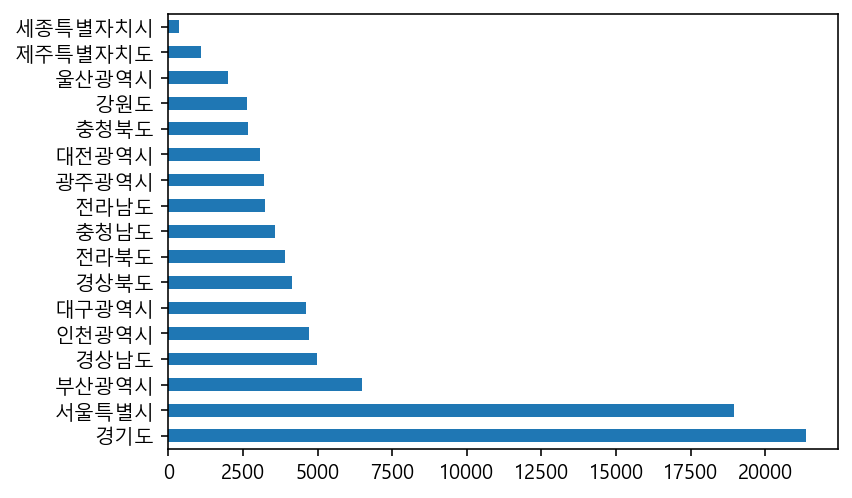

In [65]:
# pandas plot 기능 이용
# 시도명 수를 막대그래프로 표현
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

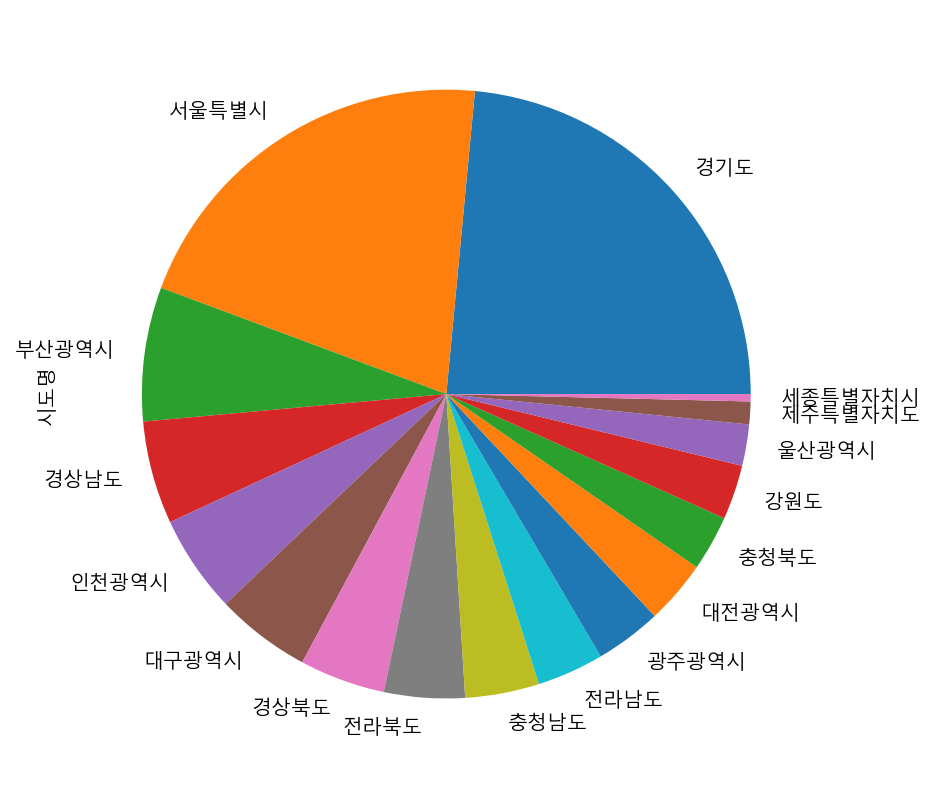

In [74]:
# pandas의 plot.pie()를 사용해서 파이그래프 그리기
city.plot.pie(figsize=(7,7))

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

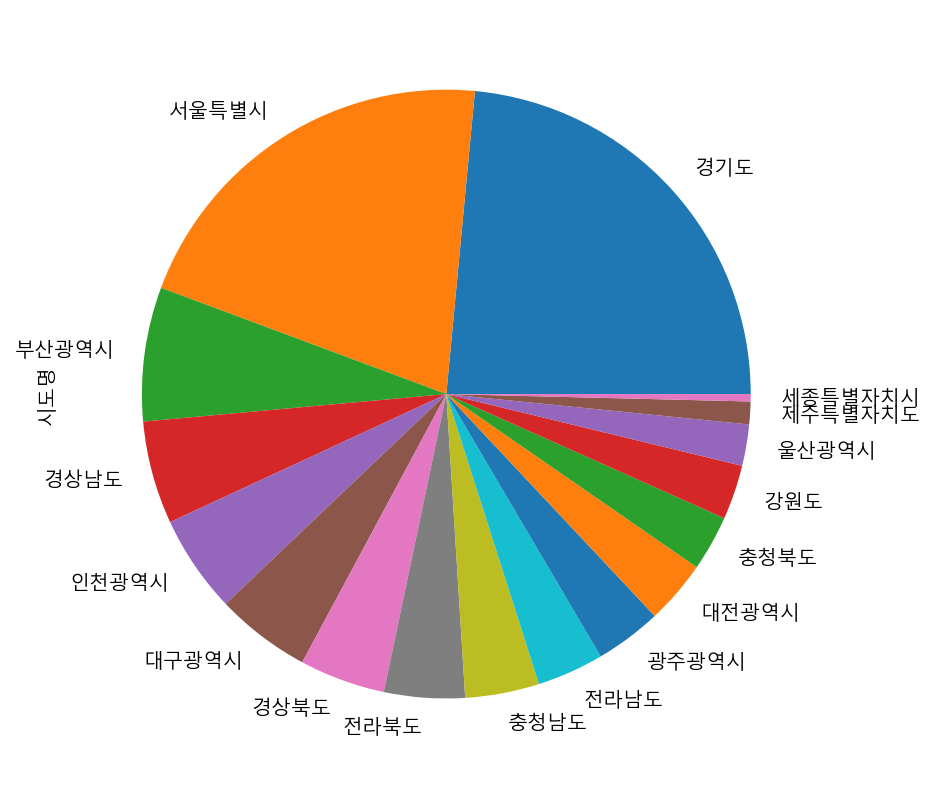

In [75]:
city_normalize.plot.pie(figsize=(7,7))

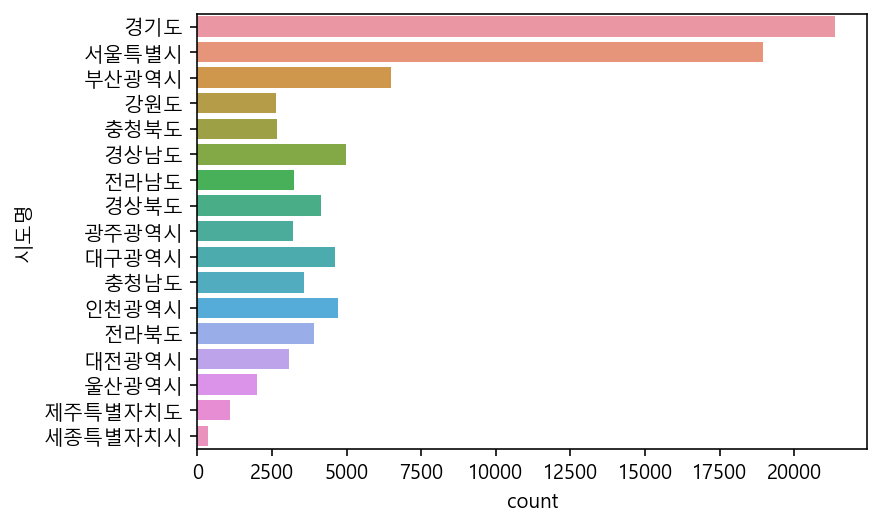

In [79]:
# seaborn의 countplot으로 그리기
c = sns.countplot(data=df, y= "시도명", )

In [80]:
# 상권업종대분류명으로 갯수 세기
df["상권업종대분류명"].value_counts() # 결측치는 제거하고 갯수 센다.

의료    91335
Name: 상권업종대분류명, dtype: int64

In [86]:
# 상권업종중분류명 갯수
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [84]:
# normalize=True를 사용해 비율 구하기
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

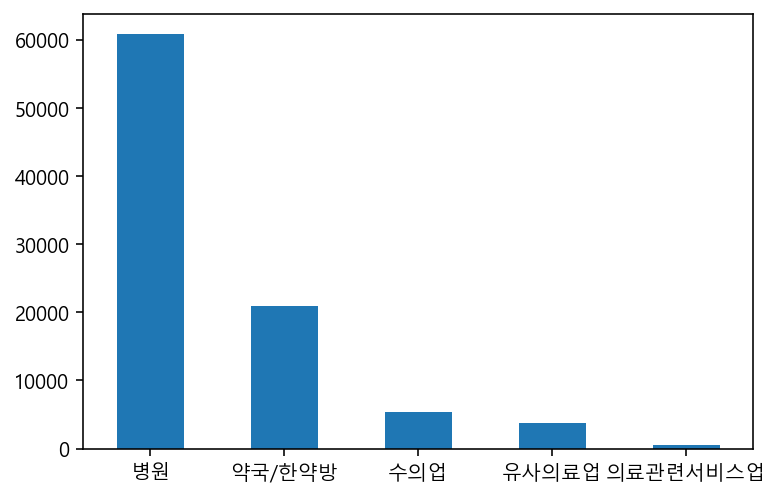

In [89]:
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

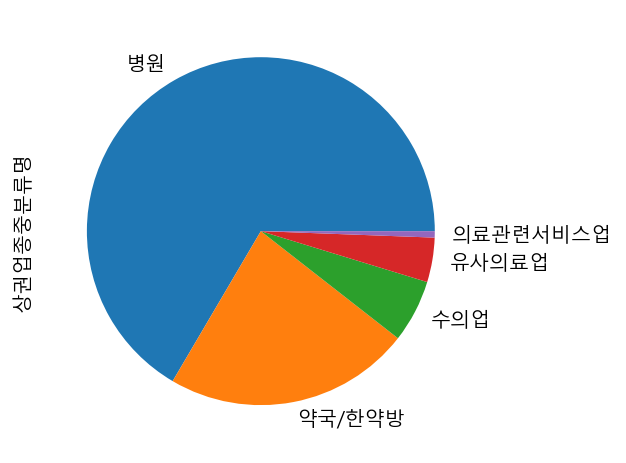

In [90]:
n.plot.pie()

In [92]:
# "상권업종소분류명" 에 대한 그룹화 된 값 카운트
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

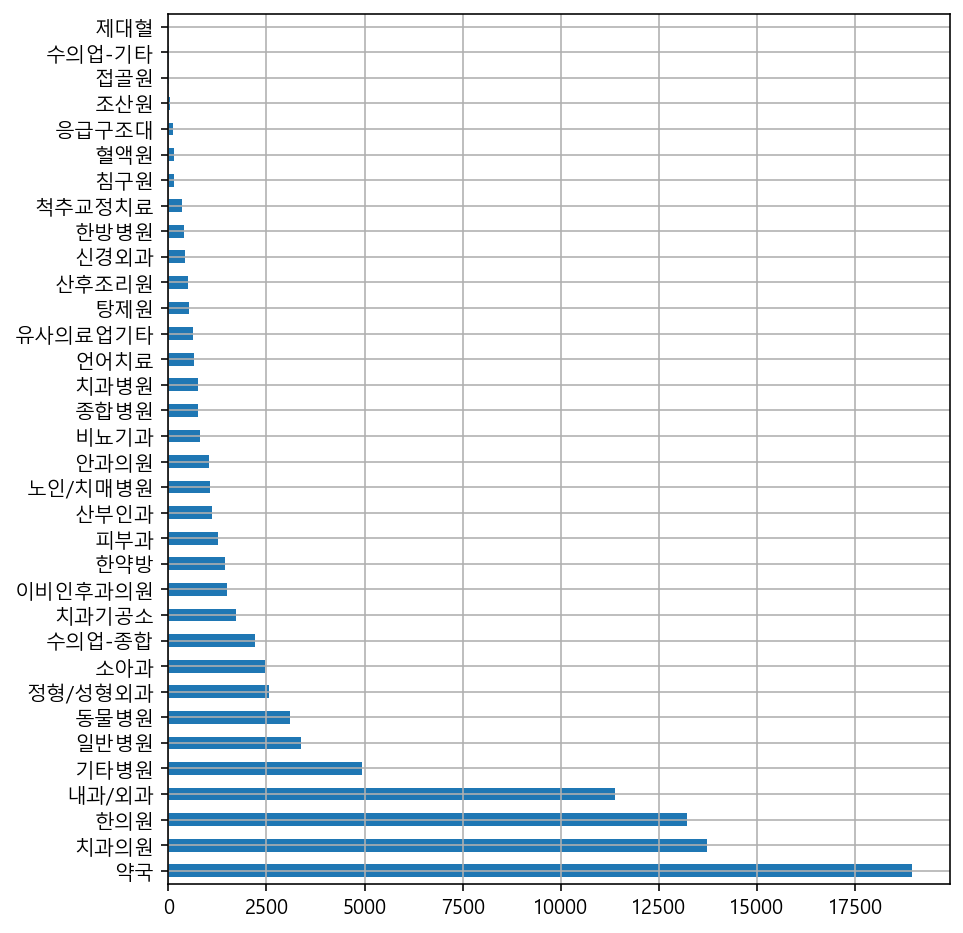

In [97]:
c.plot.barh(figsize=(7,8), grid=True)